In [1]:
from datetime import datetime
import glob
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
import zipfile

### GATHER

##### Opening the tweets.txt Json file in read mode as a string. Reading each line and transforming each line as a dictionary

import tweepy

from tweepy import OAuthHandler

import json

from timeit import default_timer as timer

consumer_key = 'HIDDEN'

consumer_secret = 'HIDDEN'

access_token = 'HIDDEN'

access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = df_1.tweet_id.values

len(tweet_ids)


count = 0

fails_dict = {}

start = timer()

with open('tweet_json.txt', 'w') as outfile:

    for tweet_id in tweet_ids:
    
        count += 1
        
        print(str(count) + ": " + str(tweet_id))
        
        try:
        
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            
            print("Success")
            
            json.dump(tweet._json, outfile)
            
            outfile.write('\n')
            
        except tweepy.TweepError as e:
        
            print("Fail")
            
            fails_dict[tweet_id] = e
            
            pass
            
end = timer()

print(end - start)

print(fails_dict)


##### Storing the twitter-archive-enhanced.csv with pandas read_csv

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

***

##### Downloading programmatically the prediction.tsv dataset 

In [3]:
import requests

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [5]:
response = requests.get(url)

In [6]:
with open('imagePrediction.tsv', 'wb') as file:
    file.write(response.content)

***

### ASSESS

#### Assessing the tweets json data 

In [7]:
#opening the textfile in read mode and reading the first line after converting it as a dictionary with json module
# exploring the first line in text after converting it to a dictionary 
with open('tweets.txt', 'r') as file:
    line = file.readline()
    print(json.loads(line))

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [8]:
#opening the textfile in read mode and reading the first line after converting it as a dictionary with json module
# exploring the dictionary keys
with open('tweets.txt', 'r') as file:
    line = file.readline()
    print(json.loads(line).keys())

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


***

##### Assessing the twiter archive enhanced data

In [9]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
df1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df1.groupby('name').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
name,,,,,,,,,,,,,,,,
Abby,2,0,0,2,2,2,0,0,0,2,2,2,2,2,2,2
Ace,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Acro,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Adele,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Aiden,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
such,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
the,8,0,0,8,8,8,0,0,0,8,8,8,8,8,8,8
this,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1


In [13]:
df1.name.nunique()

957

In [14]:
df1.retweeted_status_id.unique()

array([           nan, 8.87473957e+17, 8.86053734e+17, 8.30583321e+17,
       8.78057613e+17, 8.78281511e+17, 6.69000397e+17, 8.76850772e+17,
       8.66334965e+17, 8.68880398e+17, 8.73213776e+17, 8.72657584e+17,
       8.41077006e+17, 8.59196979e+17, 8.68552279e+17, 8.65013420e+17,
       8.66450706e+17, 8.37820168e+17, 8.63062472e+17, 8.06629075e+17,
       8.60563773e+17, 8.60914485e+17, 7.61672994e+17, 8.39549326e+17,
       8.57061112e+17, 8.44704788e+17, 8.56330159e+17, 8.42163533e+17,
       8.55122533e+17, 8.31650052e+17, 8.29374342e+17, 8.48289382e+17,
       8.33124695e+17, 8.32369877e+17, 8.47971000e+17, 7.56288534e+17,
       7.73308824e+17, 8.07106841e+17, 8.17423860e+17, 8.40632337e+17,
       6.67152164e+17, 8.39289919e+17, 8.38905981e+17, 7.83839966e+17,
       8.20749717e+17, 8.37011345e+17, 8.36648149e+17, 8.17827839e+17,
       7.86963064e+17, 8.35264099e+17, 7.53039831e+17, 8.29501995e+17,
       8.32434358e+17, 8.32766382e+17, 7.86709083e+17, 7.93286476e+17,
      

In [15]:
df1.retweeted_status_user_id.unique()

array([           nan, 4.19698384e+09, 1.96074000e+07, 5.12804507e+08,
       1.54767397e+08, 7.87461778e+17, 3.63890752e+08, 5.87097230e+07,
       6.66990130e+07, 7.47554344e+17, 3.41021133e+08, 5.97064155e+08,
       4.11984180e+07, 8.11740824e+08, 7.26634734e+08, 7.12457247e+17,
       4.46675020e+07, 4.87197737e+08, 2.48855660e+07, 7.99237010e+07,
       1.22832566e+09, 1.73272909e+09, 1.95036846e+08, 2.80479778e+08,
       7.83214000e+05, 4.29683174e+09])

In [16]:
df1.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [17]:
df1.in_reply_to_status_id.unique()

array([           nan, 8.86266357e+17, 8.81607037e+17, 8.79553827e+17,
       8.70726203e+17, 8.63425646e+17, 6.67152164e+17, 8.57156678e+17,
       8.55818117e+17, 8.56286004e+17, 8.55861584e+17, 8.55858536e+17,
       8.50328819e+17, 8.48212112e+17, 8.47606176e+17, 7.59099524e+17,
       8.40698300e+17, 8.38145499e+17, 8.38085539e+17, 8.35245984e+17,
       8.32087548e+17, 8.31903044e+17, 8.26598365e+17, 8.23326389e+17,
       8.21152593e+17, 8.13127252e+17, 8.11627233e+17, 7.33109485e+17,
       8.01854331e+17, 8.00857954e+17, 7.97123751e+17, 7.72743019e+17,
       7.66711819e+17, 7.63865175e+17, 7.50180499e+17, 7.47648654e+17,
       7.46885919e+17, 6.91416866e+17, 7.38411920e+17, 7.29113531e+17,
       7.07980066e+17, 7.03255936e+17, 7.04485745e+17, 7.03041950e+17,
       6.96488711e+17, 6.75349384e+17, 6.70668383e+17, 6.93642232e+17,
       6.93572216e+17, 6.92417313e+17, 6.92041935e+17, 6.90341254e+17,
       6.86034025e+17, 6.85547936e+17, 6.84959799e+17, 6.84481075e+17,
      

***

##### Assessing the prediction.tsv dataset 

In [18]:
df2 = pd.read_csv('imagePrediction.tsv', sep='/t', delimiter= '\s+')  
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
df2.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df2.img_num.describe()

count    2075.000000
mean        1.203855
std         0.561875
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: img_num, dtype: float64

Quality: 

-tweet timestamp is in wrong format: string

-missing values in retweeted statuses columns (3 columns) 

-duplicated names and irrational string values (this, the, unacceptable...)

-retweeted status id wrong format in float

-retweeted status user id wrong format in float

-retweeted_status_timestamp wrong format: string

-in_reply_to_status_id wrong format: float 

-in_reply_to_user_id wrong format: float


Tidiness:

-Tweet Id column duplicated in Json dataset

-one variable in 3 columns (the dogs races in 3 different columns for the same tweet id), same applies to the prediction status


### THE QUALITY AND TIDINESS ISSUES WILL NOT BE RESOLVED (WASTE OF TIME) SINCE THE DEISGNATED COLUMNS WONT BE ADDED TO SUBSEQUENT JOIN AND MERGE PROCESSES.
### NEVERTHELESS, ONE VARIABLE IN 3 COLS IN THE PREDICTION DATASET WILL BE RESOLVED 

### CLEAN

looping the Tweets Json file, transforming each line to a dictionary, and extracting the tweet ID, the Tweet date, the retweet count, and the likes count. storing the data from each loop into a dictionary, and appending it to a list. 
finalizing building a data frame with the list of dictionaries 

In [22]:
#proceeding and looping through each string line of the text file & converting each line to a dict.
# extracting the post id (integer), and the post date (string) -> converting it to a date format with datetime module 
# extracting the retweet count and likes count of each tweet (each dictionary)
# storing each line data as a dictionary in an empty df_list
# building the dataframe from the list with pandas module DataFrame

df_list = []
with open('tweets.txt', 'r') as file:
    for line in file:
        
        line = file.readline()
        line_dict = json.loads(line)
    
        post_id = line_dict['id']
    
        date_time_str = line_dict['created_at']
        post_time = datetime.strptime(date_time_str, '%a %b %d %H:%M:%S %z %Y')
     
        retweet_count = line_dict['retweet_count']
    
        likes_count = line_dict['favorite_count']

        # Append to list of dictionaries
        df_list.append({'post_id': post_id, 'post_time': post_time, 
                        'retweet_count': retweet_count, 'likes_count': likes_count})
    
df = pd.DataFrame(df_list, columns = ['post_id', 'post_time', 'retweet_count', 'likes_count'])

In [23]:
df

,post_id,post_time,retweet_count,likes_count
0,892177421306343426,2017-08-01 00:17:27+00:00,6514,33819
1,891689557279858688,2017-07-30 15:58:51+00:00,8964,42908
2,891087950875897856,2017-07-29 00:08:17+00:00,3261,20562
3,890729181411237888,2017-07-28 00:22:40+00:00,16716,56848
4,890240255349198849,2017-07-26 15:59:51+00:00,7711,32467
...,...,...,...,...
1172,666057090499244032,2015-11-16 00:55:59+00:00,146,304
1173,666051853826850816,2015-11-16 00:35:11+00:00,879,1253
1174,666049248165822465,2015-11-16 00:24:50+00:00,41,111
1175,666033412701032449,2015-11-15 23:21:54+00:00,47,128


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   post_id        1177 non-null   int64              
 1   post_time      1177 non-null   datetime64[ns, UTC]
 2   retweet_count  1177 non-null   int64              
 3   likes_count    1177 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 36.9 KB


Setting the tweet/post Id as an index to prepare for joining dataframes 

In [25]:
df.set_index('post_id', inplace= True)

In [26]:
df.head()

,post_time,retweet_count,likes_count
post_id,,,
892177421306343426,2017-08-01 00:17:27+00:00,6514,33819
891689557279858688,2017-07-30 15:58:51+00:00,8964,42908
891087950875897856,2017-07-29 00:08:17+00:00,3261,20562
890729181411237888,2017-07-28 00:22:40+00:00,16716,56848
890240255349198849,2017-07-26 15:59:51+00:00,7711,32467


***

subsetting, and extracting the most useful columns: the tweet Id, and the rating from twitter enhanced data set  

In [27]:
df1 = df1[['tweet_id', 'rating_numerator']]

In [28]:
df1

,tweet_id,rating_numerator
0,892420643555336193,13
1,892177421306343426,13
2,891815181378084864,12
3,891689557279858688,13
4,891327558926688256,12
...,...,...
2351,666049248165822465,5
2352,666044226329800704,6
2353,666033412701032449,9
2354,666029285002620928,7


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   tweet_id          2356 non-null   int64
 1   rating_numerator  2356 non-null   int64
dtypes: int64(2)
memory usage: 36.9 KB


In [30]:
df1.tweet_id.nunique()

2356

The twitter archive data set has 16 columns, the presumably most substantial columns are timestamp (the post date), which is already present with the post ID is the Json file. Furthermore, the rating numerator matters, and naturally the tweet ID, to proceed with Data frames joinining. It is important to notice here that there are 2356 rows (IDs and ratings).

In [31]:
# setting the post/tweet ID as an index to prepare for a join 

df1.set_index('tweet_id', inplace= True)

In [32]:
df1.head()

,rating_numerator
tweet_id,
892420643555336193,13
892177421306343426,13
891815181378084864,12
891689557279858688,13
891327558926688256,12


***

The tweet prediction dataset, contains tweet Ids and prediction stauses and objects/animlas in each tweet. Out of 11 columns, the tweet ID, and the predictions that are True matters most for the subsequent merging/join  

Quality: 

-Img_num has repeated of 1. and in float format

-names in p1, p2, p3 are of various objects and animals, not exclusively dogs



Tidiness:

-one variable in 3 columns (the dogs races in 3 different columns for the same tweet id), same applies to the prediction status

-Img_num column irrelevant to the dataset

***

#### Joining df and df1 

In [33]:
# joining df1 with 2356 rows and IDs on df  with 1177 rows and IDs, 
merge1 = df.join(df1)
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177 entries, 892177421306343426 to 666020888022790149
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   post_time         1177 non-null   datetime64[ns, UTC]
 1   retweet_count     1177 non-null   int64              
 2   likes_count       1177 non-null   int64              
 3   rating_numerator  1177 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 86.0 KB


In [34]:
merge1

,post_time,retweet_count,likes_count,rating_numerator
post_id,,,,
892177421306343426,2017-08-01 00:17:27+00:00,6514,33819,13
891689557279858688,2017-07-30 15:58:51+00:00,8964,42908,13
891087950875897856,2017-07-29 00:08:17+00:00,3261,20562,13
890729181411237888,2017-07-28 00:22:40+00:00,16716,56848,13
890240255349198849,2017-07-26 15:59:51+00:00,7711,32467,14
...,...,...,...,...
666057090499244032,2015-11-16 00:55:59+00:00,146,304,9
666051853826850816,2015-11-16 00:35:11+00:00,879,1253,2
666049248165822465,2015-11-16 00:24:50+00:00,41,111,5


***

#### Preparing the last dataset for merging, the df2 contains 3 prediction column with dogs name mostly suggesting that each picture contains more than one dog. the  approach would be to subset each dog column with True prediction and tweet IDs and join it on the previous merged 2 data sets. In total, we will perform 3 merging. 

In [35]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [36]:
df2_dog1 = df2[df2.p1_dog == True][['tweet_id', 'p1']]
df2_dog1

,tweet_id,p1
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher
...,...,...
2068,890971913173991426,Appenzeller
2069,891087950875897856,Chesapeake_Bay_retriever
2070,891327558926688256,basset
2072,891815181378084864,Chihuahua


In [37]:
# setting the post/tweet ID as an index to prepare for a join 

df2_dog1.set_index('tweet_id', inplace= True)

***

First merge between Result (merged df and df1) and df2_dog1 

In [38]:
dataset = merge1.join(df2_dog1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177 entries, 892177421306343426 to 666020888022790149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   post_time         1177 non-null   datetime64[ns, UTC]
 1   retweet_count     1177 non-null   int64              
 2   likes_count       1177 non-null   int64              
 3   rating_numerator  1177 non-null   int64              
 4   p1                764 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 95.2+ KB


***

Preparing the second dog column for merging 

In [39]:
df2_dog2 = df2[df2.p2_dog == True][['tweet_id', 'p2']]
df2_dog2

,tweet_id,p2
0,666020888022790149,collie
1,666029285002620928,miniature_pinscher
2,666033412701032449,malinois
3,666044226329800704,redbone
4,666049248165822465,Rottweiler
...,...,...
2069,891087950875897856,Irish_terrier
2070,891327558926688256,English_springer
2071,891689557279858688,Labrador_retriever
2072,891815181378084864,malamute


In [40]:
# setting the post/tweet ID as an index to prepare for a join 

df2_dog2.set_index('tweet_id', inplace= True)

Merging df2_dog2 with dataset 

In [41]:
dataset2 = dataset.join(df2_dog2)
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177 entries, 892177421306343426 to 666020888022790149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   post_time         1177 non-null   datetime64[ns, UTC]
 1   retweet_count     1177 non-null   int64              
 2   likes_count       1177 non-null   int64              
 3   rating_numerator  1177 non-null   int64              
 4   p1                764 non-null    object             
 5   p2                774 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 104.4+ KB


In [42]:
dataset2

,post_time,retweet_count,likes_count,rating_numerator,p1,p2
post_id,,,,,,
892177421306343426,2017-08-01 00:17:27+00:00,6514,33819,13,Chihuahua,Pekinese
891689557279858688,2017-07-30 15:58:51+00:00,8964,42908,13,NaN,Labrador_retriever
891087950875897856,2017-07-29 00:08:17+00:00,3261,20562,13,Chesapeake_Bay_retriever,Irish_terrier
890729181411237888,2017-07-28 00:22:40+00:00,16716,56848,13,Pomeranian,Eskimo_dog
890240255349198849,2017-07-26 15:59:51+00:00,7711,32467,14,Pembroke,Cardigan
...,...,...,...,...,...,...
666057090499244032,2015-11-16 00:55:59+00:00,146,304,9,NaN,NaN
666051853826850816,2015-11-16 00:35:11+00:00,879,1253,2,NaN,NaN
666049248165822465,2015-11-16 00:24:50+00:00,41,111,5,miniature_pinscher,Rottweiler


***

Preparing the third dog column for merging with data (dataframe)

In [43]:
df2_dog3 = df2[df2.p3_dog == True][['tweet_id', 'p3']]
df2_dog3

,tweet_id,p3
0,666020888022790149,Shetland_sheepdog
1,666029285002620928,Rhodesian_ridgeback
2,666033412701032449,bloodhound
3,666044226329800704,miniature_pinscher
4,666049248165822465,Doberman
...,...,...
2066,890609185150312448,Chesapeake_Bay_retriever
2067,890729181411237888,Pembroke
2070,891327558926688256,German_short-haired_pointer
2072,891815181378084864,kelpie


In [44]:
# setting the post/tweet ID as an index to prepare for a join 

df2_dog3.set_index('tweet_id', inplace= True)

Merging df2_dog3 with dataset 

In [45]:
final_data = dataset2.join(df2_dog3)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177 entries, 892177421306343426 to 666020888022790149
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   post_time         1177 non-null   datetime64[ns, UTC]
 1   retweet_count     1177 non-null   int64              
 2   likes_count       1177 non-null   int64              
 3   rating_numerator  1177 non-null   int64              
 4   p1                764 non-null    object             
 5   p2                774 non-null    object             
 6   p3                755 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 113.6+ KB


In [46]:
final_data

,post_time,retweet_count,likes_count,rating_numerator,p1,p2,p3
post_id,,,,,,,
892177421306343426,2017-08-01 00:17:27+00:00,6514,33819,13,Chihuahua,Pekinese,papillon
891689557279858688,2017-07-30 15:58:51+00:00,8964,42908,13,NaN,Labrador_retriever,NaN
891087950875897856,2017-07-29 00:08:17+00:00,3261,20562,13,Chesapeake_Bay_retriever,Irish_terrier,NaN
890729181411237888,2017-07-28 00:22:40+00:00,16716,56848,13,Pomeranian,Eskimo_dog,Pembroke
890240255349198849,2017-07-26 15:59:51+00:00,7711,32467,14,Pembroke,Cardigan,Chihuahua
...,...,...,...,...,...,...,...
666057090499244032,2015-11-16 00:55:59+00:00,146,304,9,NaN,NaN,golden_retriever
666051853826850816,2015-11-16 00:35:11+00:00,879,1253,2,NaN,NaN,NaN
666049248165822465,2015-11-16 00:24:50+00:00,41,111,5,miniature_pinscher,Rottweiler,Doberman


In [47]:
final_data.columns = ['post_time', 'retweet_count', 'likes_count', 'rating_over_10', 'animal_1', 'animal_2', 'animal_3']

In [48]:
final_data

,post_time,retweet_count,likes_count,rating_over_10,animal_1,animal_2,animal_3
post_id,,,,,,,
892177421306343426,2017-08-01 00:17:27+00:00,6514,33819,13,Chihuahua,Pekinese,papillon
891689557279858688,2017-07-30 15:58:51+00:00,8964,42908,13,NaN,Labrador_retriever,NaN
891087950875897856,2017-07-29 00:08:17+00:00,3261,20562,13,Chesapeake_Bay_retriever,Irish_terrier,NaN
890729181411237888,2017-07-28 00:22:40+00:00,16716,56848,13,Pomeranian,Eskimo_dog,Pembroke
890240255349198849,2017-07-26 15:59:51+00:00,7711,32467,14,Pembroke,Cardigan,Chihuahua
...,...,...,...,...,...,...,...
666057090499244032,2015-11-16 00:55:59+00:00,146,304,9,NaN,NaN,golden_retriever
666051853826850816,2015-11-16 00:35:11+00:00,879,1253,2,NaN,NaN,NaN
666049248165822465,2015-11-16 00:24:50+00:00,41,111,5,miniature_pinscher,Rottweiler,Doberman


In [49]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177 entries, 892177421306343426 to 666020888022790149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   post_time       1177 non-null   datetime64[ns, UTC]
 1   retweet_count   1177 non-null   int64              
 2   likes_count     1177 non-null   int64              
 3   rating_over_10  1177 non-null   int64              
 4   animal_1        764 non-null    object             
 5   animal_2        774 non-null    object             
 6   animal_3        755 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 113.6+ KB


### with various merges, some of the data is lost. Moreover, False prediction data does not reveal the actual object/animal in the pic, which leaves some of the tweets with one or 2 dogs, and in some cases NaN values in all rows but the tweet has likes and been retweeted. There is no other option to minimize the loss of data by dropping all rows that have exclusively in all columns NaN values. 

In [50]:
final_data.dropna(subset=['animal_1', 'animal_2', 'animal_3'], how='all', inplace= True)

In [51]:
final_data

,post_time,retweet_count,likes_count,rating_over_10,animal_1,animal_2,animal_3
post_id,,,,,,,
892177421306343426,2017-08-01 00:17:27+00:00,6514,33819,13,Chihuahua,Pekinese,papillon
891689557279858688,2017-07-30 15:58:51+00:00,8964,42908,13,NaN,Labrador_retriever,NaN
891087950875897856,2017-07-29 00:08:17+00:00,3261,20562,13,Chesapeake_Bay_retriever,Irish_terrier,NaN
890729181411237888,2017-07-28 00:22:40+00:00,16716,56848,13,Pomeranian,Eskimo_dog,Pembroke
890240255349198849,2017-07-26 15:59:51+00:00,7711,32467,14,Pembroke,Cardigan,Chihuahua
...,...,...,...,...,...,...,...
666063827256086533,2015-11-16 01:22:45+00:00,232,496,10,golden_retriever,Tibetan_mastiff,Labrador_retriever
666057090499244032,2015-11-16 00:55:59+00:00,146,304,9,NaN,NaN,golden_retriever
666049248165822465,2015-11-16 00:24:50+00:00,41,111,5,miniature_pinscher,Rottweiler,Doberman


### We can resturcture the data frame by subseting with each animal/object colum -> having 3 dataset to concatenate -> the final data set will have Tweet ids repeated. and can be grouped by tweet IDs again

In [52]:
animal_1 = final_data[['post_time', 'retweet_count', 'likes_count', 'rating_over_10', 'animal_1']]
animal_2 = final_data[['post_time', 'retweet_count', 'likes_count', 'rating_over_10', 'animal_2']]
animal_3 = final_data[['post_time', 'retweet_count', 'likes_count', 'rating_over_10', 'animal_3']]

 remove rows in each single data frame that has an NaN value 

In [53]:
%%capture
animal_1.dropna(inplace= True)
animal_2.dropna(inplace= True)
animal_3.dropna(inplace= True)

Re-uniting the columns names pre-concatenation process

In [54]:
animal_1.columns = ['post_time', 'retweet_count', 'likes_count', 'rating_over_10', 'animal/object']
animal_2.columns = ['post_time', 'retweet_count', 'likes_count', 'rating_over_10', 'animal/object']
animal_3.columns = ['post_time', 'retweet_count', 'likes_count', 'rating_over_10', 'animal/object']

***

re-merge all the datasets (combine) 

In [55]:
frames = [animal_1, animal_2, animal_3]

twitter_archive_master = pd.concat(frames)

In [56]:
twitter_archive_master

,post_time,retweet_count,likes_count,rating_over_10,animal/object
post_id,,,,,
892177421306343426,2017-08-01 00:17:27+00:00,6514,33819,13,Chihuahua
891087950875897856,2017-07-29 00:08:17+00:00,3261,20562,13,Chesapeake_Bay_retriever
890729181411237888,2017-07-28 00:22:40+00:00,16716,56848,13,Pomeranian
890240255349198849,2017-07-26 15:59:51+00:00,7711,32467,14,Pembroke
889880896479866881,2017-07-25 16:11:53+00:00,5156,28268,13,French_bulldog
...,...,...,...,...,...
666063827256086533,2015-11-16 01:22:45+00:00,232,496,10,Labrador_retriever
666057090499244032,2015-11-16 00:55:59+00:00,146,304,9,golden_retriever
666049248165822465,2015-11-16 00:24:50+00:00,41,111,5,Doberman


In [57]:
twitter_archive_master.reset_index(inplace= True)

In [58]:
twitter_archive_master

,post_id,post_time,retweet_count,likes_count,rating_over_10,animal/object
0,892177421306343426,2017-08-01 00:17:27+00:00,6514,33819,13,Chihuahua
1,891087950875897856,2017-07-29 00:08:17+00:00,3261,20562,13,Chesapeake_Bay_retriever
2,890729181411237888,2017-07-28 00:22:40+00:00,16716,56848,13,Pomeranian
3,890240255349198849,2017-07-26 15:59:51+00:00,7711,32467,14,Pembroke
4,889880896479866881,2017-07-25 16:11:53+00:00,5156,28268,13,French_bulldog
...,...,...,...,...,...,...
2288,666063827256086533,2015-11-16 01:22:45+00:00,232,496,10,Labrador_retriever
2289,666057090499244032,2015-11-16 00:55:59+00:00,146,304,9,golden_retriever
2290,666049248165822465,2015-11-16 00:24:50+00:00,41,111,5,Doberman
2291,666033412701032449,2015-11-15 23:21:54+00:00,47,128,9,bloodhound


In [59]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

***

### MINI EDA analysis of the merged 3 data sets

In [60]:
data = pd.read_csv('twitter_archive_master.csv')

In [61]:
data.head()

,post_id,post_time,retweet_count,likes_count,rating_over_10,animal/object
0,892177421306343426,2017-08-01 00:17:27+00:00,6514,33819,13,Chihuahua
1,891087950875897856,2017-07-29 00:08:17+00:00,3261,20562,13,Chesapeake_Bay_retriever
2,890729181411237888,2017-07-28 00:22:40+00:00,16716,56848,13,Pomeranian
3,890240255349198849,2017-07-26 15:59:51+00:00,7711,32467,14,Pembroke
4,889880896479866881,2017-07-25 16:11:53+00:00,5156,28268,13,French_bulldog


REMOVING DUPLICATES BEFORE ANALYZING NUMERICAL VARIABLES 

In [62]:
data_copy = data.copy()

In [63]:
index = data_copy.index
is_duplicate = index.duplicated(keep="first")
not_duplicate = ~is_duplicate
data_copy_no_duplicates = data_copy[not_duplicate]

In [64]:
data_copy_no_duplicates.head()

,post_id,post_time,retweet_count,likes_count,rating_over_10,animal/object
0,892177421306343426,2017-08-01 00:17:27+00:00,6514,33819,13,Chihuahua
1,891087950875897856,2017-07-29 00:08:17+00:00,3261,20562,13,Chesapeake_Bay_retriever
2,890729181411237888,2017-07-28 00:22:40+00:00,16716,56848,13,Pomeranian
3,890240255349198849,2017-07-26 15:59:51+00:00,7711,32467,14,Pembroke
4,889880896479866881,2017-07-25 16:11:53+00:00,5156,28268,13,French_bulldog


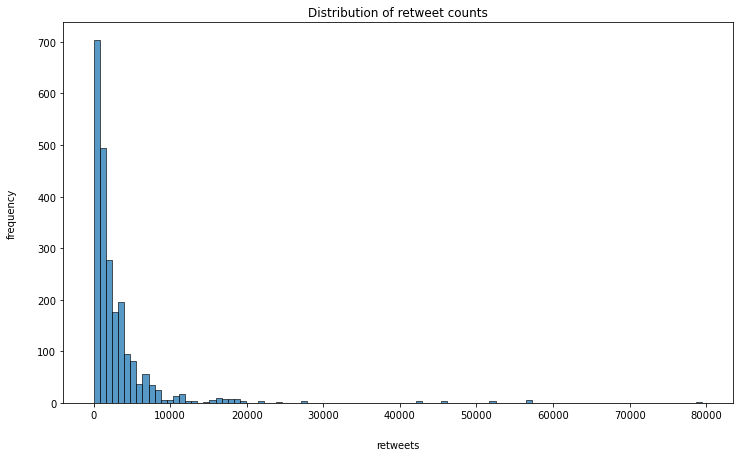

In [75]:
ax, fig = plt.subplots(figsize=(12,7))
ax = sns.histplot(data=data_copy_no_duplicates, x="retweet_count", bins= 100)
plt.xlabel('retweets', labelpad= 20)
plt.ylabel('frequency', labelpad= 20)
plt.title('Distribution of retweet counts');

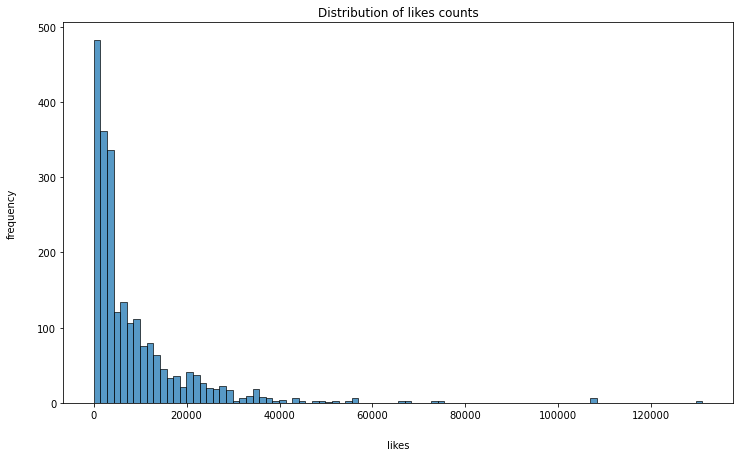

In [74]:
ax, fig = plt.subplots(figsize=(12,7))
ax = sns.histplot(data=data_copy_no_duplicates, x="likes_count")
plt.xlabel('likes', labelpad= 20)
plt.ylabel('frequency', labelpad= 20)
plt.title('Distribution of likes counts');

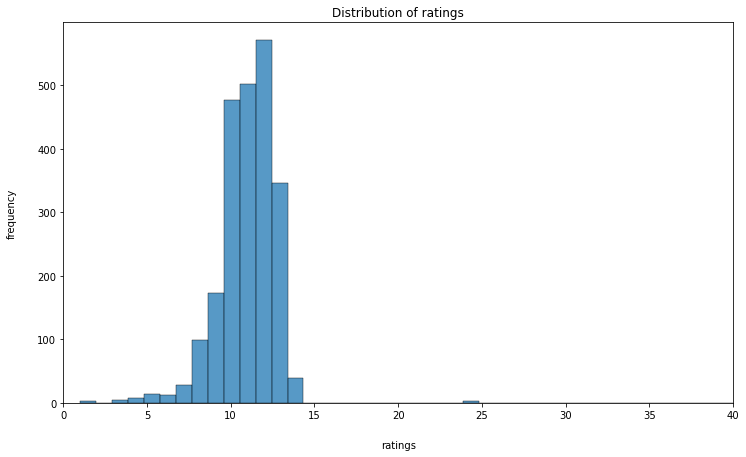

In [73]:
ax, fig = plt.subplots(figsize=(12,7))
ax = sns.histplot(data=data_copy_no_duplicates, x="rating_over_10", bins= 150)
plt.xlim((0,40))
plt.xlabel('ratings', labelpad= 20)
plt.ylabel('frequency', labelpad= 20)
plt.title('Distribution of ratings');

In [76]:
# picture with the most likes 

data_copy[data_copy.likes_count == max(data_copy.likes_count)]

,post_id,post_time,retweet_count,likes_count,rating_over_10,animal/object
324,744234799360020481,2016-06-18 18:26:18+00:00,79515,131075,13,Labrador_retriever
1865,744234799360020481,2016-06-18 18:26:18+00:00,79515,131075,13,whippet


In [77]:
# picture with the most retweets

data_copy[data_copy.retweet_count == max(data_copy.retweet_count)]

,post_id,post_time,retweet_count,likes_count,rating_over_10,animal/object
324,744234799360020481,2016-06-18 18:26:18+00:00,79515,131075,13,Labrador_retriever
1865,744234799360020481,2016-06-18 18:26:18+00:00,79515,131075,13,whippet
